In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import importlib
import tools
from datetime import datetime
from datetime import timedelta

import pyroms

scrip.so not found. Remapping function will not be available


## Function to obtain WMOP equivalents to Argo observations 

#### Argo observations are interpolated to WMOP depths. Argo and Model equivalent observations at nearest grid point to obervation are given as output

In [2]:

def interpolate_argo_to_wmop(ds_wmop, ds_argo, variable, grid=None):
    
    """Argo observations are interpolated to WMOP depths. Argo and Model equivalent observations
    at nearest grid point to obervation are given as output
    
    Inputs: 
     - ds_wmop (DataSet of WMOP fields for target day)
     - ds_argo (DataSet of postprocessed data where Argo observations are obtained from)
     - variable: 'temp' or 'salt'
     - grid: WMOP grid (pyroms object)
     
    Outputs:
     - vari_interp (Argo interpolated to WMOP depths)
     - vari_wmop (WMOP equivalent profiles)
     - zeta_roms
     
    """
    # Longitude and Latitude of the Argo profiles
    lon_wmop = ds_wmop.lon_rho.values[1,:]
    lat_wmop = ds_wmop.lat_rho.values[:,1]
    lon_argo = ds_argo.lon_argo.values
    lat_argo = ds_argo.lat_argo.values

    # Index of Nearest neighbour to Argo observations
    id_lon = [np.abs(lon_wmop-lon).argmin() for lon in lon_argo] 
    id_lat = [np.abs(lat_wmop-lat).argmin() for lat in lat_argo] 

    #z_r = grid.vgrid.z_r[:]
    
    # Extract Temperatures for WMOP and Argo profiles
    vari_argo = ds_argo[variable + '_roms'].values
    zeta_argo = ds_argo['depth_roms'].values
    #zeta_roms = z_r[:,id_lat, id_lon]
    vari_wmop = ds_wmop[variable].values[0,:, id_lat, id_lon]

    #vari_interp = np.zeros((ds_argo.dims['n_prof'], 32))
    #for i in ds_argo.n_prof.values:    

     #   vari = [np.interp( -z, zeta_argo[i,:], vari_argo[i,:])  for z in zeta_roms[:,i]]
      #  vari_interp[i,:] = np.array(vari)
        
    #return vari_interp, vari_wmop, zeta_roms.T
    return vari_argo, vari_wmop, zeta_argo

## Get Argo Profiles and WMOP equivalents for the different simualtions

For each simualtion day, Argo observations are extracted from de WMOP NetCDF postprocessed files.
Model equivalents to observations are extracted for each simulation and Argo observations are interpolated to ROMS depths for comparison

In [22]:
# Create empty dictionaries to store profiles
temp = {}; salt = {}

# Define date
date = datetime(2014,9,21)
date_end = datetime(2014,10,20)

while date<date_end:
    
    strdate = date.strftime('%Y%m%d')
    temp[strdate] = {}
    salt[strdate] = {}

    # Define paths to Argo and model reference files
    file_argo = '/home/modelling/data/WMOP/WMOP_FORECAST/Outputs/FORECAST_CMEMS_RESTARTS/archive/{0}/roms_Argo_{1}_dt.nc'.format(date.strftime('%Y/%m'),date.strftime('%Y%m%d'))
    file_noassim = '/home/modelling/data/workdir_2/HFR_DA/HFR_NOASSIM_Oct2014/roms_WMOP_ASSIM_{0}_avg.nc'.format(date.strftime('%Y%m%d'))

    # Load Grid
    grid = pyroms.grid.get_ROMS_grid('wmop', hist_file=file_noassim, grid_file=file_noassim)

    # Load Argo and WMOP reference (NOASSIM) DataSets
    ds_argo = xr.open_dataset(file_argo)
    ds_noassim = xr.open_dataset(file_noassim)

    # Extract Argo profiles and WMOP equivalents (NOASSIM)
    temp[strdate]['argo'], temp[strdate]['noassim'], temp[strdate]['zeta'] = interpolate_argo_to_wmop(ds_noassim, ds_argo, 'temp', grid=grid)
    salt[strdate]['argo'], salt[strdate]['noassim'], salt[strdate]['zeta'] = interpolate_argo_to_wmop(ds_noassim, ds_argo, 'salt', grid=grid)

    # Experiment name
    experiments = ['NOASSIM','all_future_nudging', 'all_actual_nudging', 'generic_nudging','all_future_nonudging', 'all_actual_nonudging', 'generic_nonudging']
    
    for exp_name in experiments:

        if exp_name in ['NOASSIM']:
            path_wmop = '/home/modelling/data/workdir_2/HFR_DA/HFR_{0}_Oct2014'.format(exp_name)
        else:
            path_wmop = '/DATA/jhernandez/ROMS/Outputs/HFR_{0}_Oct2014_OSSE_v2/'.format(exp_name)
            
            
        # Define path to WMOP ASSIM file
        file_assim = '{0}/roms_WMOP_ASSIM_{1}_avg.nc'.format( path_wmop, date.strftime('%Y%m%d'))
        # Load DataSet
        ds_assim = xr.open_dataset(file_assim)

        # Extract Argo profiles and WMOP equivalents (Experiment)
        temp[strdate]['argo'], temp[strdate][exp_name], temp[strdate]['zeta'] = interpolate_argo_to_wmop(ds_assim, ds_argo, 'temp', grid=grid)
        salt[strdate]['argo'], salt[strdate][exp_name], salt[strdate]['zeta'] = interpolate_argo_to_wmop(ds_assim, ds_argo, 'salt', grid=grid)

        
    date = date + timedelta(days=1)
        
print('DONE')        

Assuming spherical is integer b'T' <class 'numpy.ma.core.MaskedArray'>
Load geographical grid from file
Assuming spherical is integer b'T' <class 'numpy.ma.core.MaskedArray'>
Load geographical grid from file
Assuming spherical is integer b'T' <class 'numpy.ma.core.MaskedArray'>
Load geographical grid from file
Assuming spherical is integer b'T' <class 'numpy.ma.core.MaskedArray'>
Load geographical grid from file
Assuming spherical is integer b'T' <class 'numpy.ma.core.MaskedArray'>
Load geographical grid from file
Assuming spherical is integer b'T' <class 'numpy.ma.core.MaskedArray'>
Load geographical grid from file
Assuming spherical is integer b'T' <class 'numpy.ma.core.MaskedArray'>
Load geographical grid from file
Assuming spherical is integer b'T' <class 'numpy.ma.core.MaskedArray'>
Load geographical grid from file
Assuming spherical is integer b'T' <class 'numpy.ma.core.MaskedArray'>
Load geographical grid from file
Assuming spherical is integer b'T' <class 'numpy.ma.core.MaskedA

## Create full time period vectors containing all the observations

For every day NaN values from Argo obs (due to interpolation mainly) are extracted and all daily profiles are put as a vector. 

All observations are concatenated, having a unique vector with all observations for the full period

In [23]:
# Create time series of the full period
temp['full-period'] = {}
salt['full-period'] = {}

for k in  list(temp['20140921']):
    temp['full-period'][k] = np.array([])
    salt['full-period'][k] = np.array([])

# Loop over the days of simulation
for i, day in enumerate(list(temp.keys())[:-1]):
    
    # Localize NaN values
    id1_nan = np.isnan(temp[day]['argo'])==0
    id2_nan = np.isnan(salt[day]['argo'])==0
    
    # Loop over the different simulations for every day
    for k in  temp[day]:        
        temp['full-period'][k] = np.concatenate(( temp['full-period'][k], temp[day][k][id1_nan]))
        salt['full-period'][k] = np.concatenate(( salt['full-period'][k], salt[day][k][id2_nan]))
        

# Calculate RMSD evolution

In [5]:
import skill_metrics as sm

In [6]:
temp['20140925'].keys()

dict_keys(['argo', 'noassim', 'zeta', 'NOASSIM', 'all_future_nudging', 'all_actual_nudging', 'generic_nudging', 'all_future_nonudging', 'all_actual_nonudging', 'generic_nonudging'])

In [24]:
temp['rmsd'] = {};
salt['rmsd'] = {};
#exps = [list(temp['20140921'].keys())[i] for i in [1,3,4,5]]
experiments = ['NOASSIM','all_future_nudging', 'all_actual_nudging', 'generic_nudging', 'all_future_nonudging', 'all_actual_nonudging', 'generic_nonudging']

for k in  experiments:
    temp['rmsd'][k] = []
    salt['rmsd'][k] = []
    
    for i, day in enumerate(list(temp.keys())[:-2]):
   
        # Localize NaN values
        id1_nan = np.isnan(temp[day]['argo'])==0
        id2_nan = np.isnan(salt[day]['argo'])==0
        
        temp['rmsd'][k].append( sm.rmsd(temp[day][k][id1_nan], temp[day]['argo'][id1_nan])) 
        salt['rmsd'][k].append( sm.rmsd(salt[day][k][id2_nan], salt[day]['argo'][id2_nan])) 
        
    temp['rmsd'][k] = np.array(temp['rmsd'][k])
    salt['rmsd'][k] = np.array(salt['rmsd'][k])
                

## Plot RMSD evolution

In [ ]:
%matplotlib inline

strdate = '20140921'
nprof = salt[strdate]['argo'].shape[0]

for i in range(nprof):
    plt.figure(figsize=(15,6))
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    for e in (['argo'] + exps):        
        ax1.plot(temp[strdate][e][i,:], temp[strdate]['zeta'][i,:])        
        ax2.plot(salt[strdate][e][i,:], salt[strdate]['zeta'][i,:])
        
    ax1.set_ylim([-200,0])
    ax2.set_ylim([-200,0])
    ax1.legend(['Argo'] + exps)
    ax2.legend(['Argo'] + exps)
plt.show(None)

#### Create date vector for xtick

In [25]:
t0 = datetime(2014,9,21)
t = [t0 + timedelta(days=i) for i in range(31)]
xt = range(0,31,3)
tt = [time.strftime('%d/%m/%Y') for time in t]

#### Plot

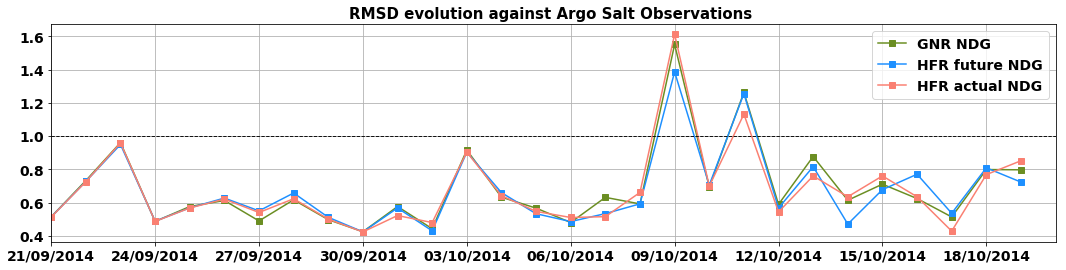

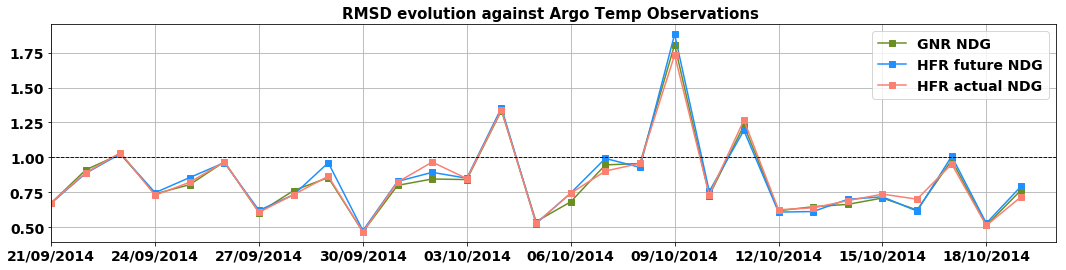

In [49]:
# Define experiments and labels for legend
exp_names = ['NOASSIM', 'generic_nudging', 'generic_nonudging', 'all_future_nudging', 'all_future_nonudging', 'all_actual_nudging', 'all_actual_nonudging']
labels = ['NOASSIM', 'GNR NDG', 'GNR ANL', 'HFR future NDG', 'HFR future ANL', 'HFR actual NDG', 'HFR actual ANL']
colors = ['m', 'olivedrab', 'darkgreen', 'dodgerblue', 'darkblue', 'salmon', 'darkred']

# Subset
subset = [1,3,5]
#subset = [2,4,6]
#subset=[1,2,3,4,5,6]
exp_names = [exp_names[i] for i in subset];  labels = [labels[i] for i in subset]; colors = [colors[i] for i in subset]


# Plot Salinity RMSD
fig_rmsd_evolution_salt = plt.figure(figsize=(18,4))

for i, exp in  enumerate(exp_names):
    #plt.plot(salt['rmsd'][exp], marker='s', linestyle='-', color=colors[i])
    plt.plot(salt['rmsd'][exp] / salt['rmsd']['NOASSIM'], marker='s', linestyle='-', color=colors[i])
plt.legend(labels)
plt.title('RMSD evolution against Argo Salt Observations ', fontweight='bold', fontsize=15)
plt.grid(True)
plt.xticks(ticks=list(xt),labels=tt[0:-1:3])
plt.xlim((0,29))

plt.plot(range(31), [1]*31, 'k--', linewidth=0.9)  # Mark value=1

plt.show()

# Plot Temperature RMSD
fig_rmsd_evolution_temp = plt.figure(figsize=(18,4))


for i, exp in  enumerate(exp_names):
    #plt.plot(temp['rmsd'][exp], marker='s', linestyle='-', color=colors[i])
    plt.plot(temp['rmsd'][exp] / temp['rmsd']['NOASSIM'], marker='s', linestyle='-', color=colors[i])
    
plt.legend(labels)
plt.title('RMSD evolution against Argo Temp Observations ', fontweight='bold', fontsize=15)
plt.grid(True)
plt.xticks(ticks=list(xt),labels=tt[0:-1:3])
plt.xlim((0,29))

plt.plot(range(31), [1]*31, 'k--', linewidth=0.9)  # Mark value=1

plt.show()

In [50]:
fig_rmsd_evolution_salt.savefig('/home/jhernandez/Escritorio/OSSE_v2/rmsd_evolution_argo_salt_OSSE_ndg.png', dpi=250)
fig_rmsd_evolution_temp.savefig('/home/jhernandez/Escritorio/OSSE_v2/rmsd_evolution_argo_temp_OSSE_ndg.png', dpi=250)

In [32]:
for exp in exp_names[0:]:
    print('{0}: '.format(exp))
    print(np.mean(salt['rmsd'][exp], axis=0)/ np.mean(salt['rmsd']['NOASSIM'], axis=0))
    print('')

NOASSIM: 
1.0

generic_nudging: 
0.6398600912860506

generic_nonudging: 
0.6110643398242461

all_future_nudging: 
0.6290067866198207

all_future_nonudging: 
0.6362533172426507

all_actual_nudging: 
0.6318591111187243

all_actual_nonudging: 
0.6348315606537367



## Taylor Diagram

In [ ]:
import skill_metrics as sm

In [14]:
# Define experiments and labels for legend
experiments = ['NOASSIM', 'generic_nudging', 'generic_nonudging', 'all_future_nudging', 'all_future_nonudging', 'all_actual_nudging', 'all_actual_nonudging']
labels = ['CR', 'GNR NDG', 'GNR ANL', 'HFR future NDG', 'HFR future ANL', 'HFR actual NDG', 'HFR actual ANL']
colors = ['black', 'olivedrab', 'darkgreen', 'dodgerblue', 'darkblue', 'salmon', 'darkred']

# Subset
subset = [0,1,3,5]
subset = [0,2,4,6]
#subset = [0,1,2,3,4,5,6]
experiments = [experiments[i] for i in subset];  labels = [labels[i] for i in subset]; colors = [colors[i] for i in subset]


### Salinity

In [15]:
sdev = []; crmsd = []; ccoef = []; taylor_stats = {}

# Calculate taylor diagram stats for the different experiments selcted
for e in experiments:
    taylor_stats[e] = sm.taylor_statistics(salt['full-period'][e], salt['full-period']['argo'])
    sdev.append(taylor_stats[e]['sdev'][1])
    crmsd.append(taylor_stats[e]['crmsd'][1])
    ccoef.append(taylor_stats[e]['ccoef'][1])

# Add reference value and convert to array
sdev = np.array([taylor_stats['NOASSIM']['sdev'][0]] + sdev)
crmsd = np.array([taylor_stats['NOASSIM']['crmsd'][0]] + crmsd)
ccoef = np.array([taylor_stats['NOASSIM']['ccoef'][0]] + ccoef)

In [16]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

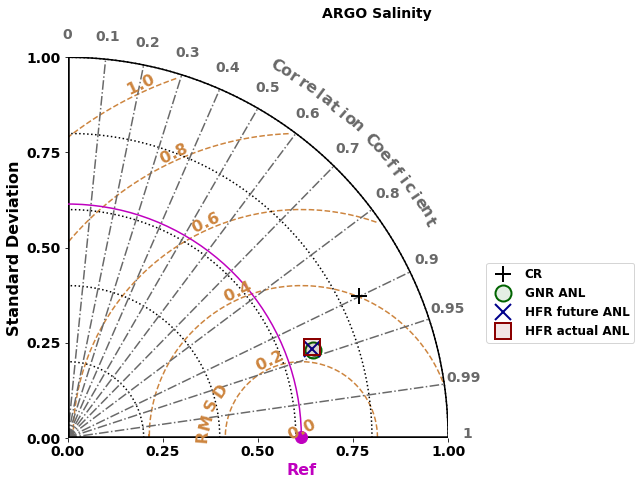

In [17]:

label = ['Argo'] + labels

fig_taylor_salt = plt.figure(num=1, figsize=(12,7))
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel=label,  markerLabelColor = 'r', 
                      markerLegend = 'on', markerColor = colors,
                      styleOBS = '-', colOBS = 'm', markerobs = 'o',
                      markerSize = 16, tickRMS = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], 
                      colRMS = 'peru', colCOR = 'dimgrey',
                      tickRMSangle = 115, showlabelsRMS = 'on',
                      titleRMS = 'on', titleOBS = 'Ref', checkstats = 'on', alpha=0.1)

plt.suptitle('ARGO Salinity', fontsize=14, fontweight='bold')

plt.show()

In [18]:
fig_taylor_salt.savefig('/home/jhernandez/Escritorio/OSSE/taylor_diagram_salinity_argo_OSSE_anl.png', dpi=250)

### Temperature

In [19]:
sdev = []; crmsd = []; ccoef = []; taylor_stats = {}

# Calculate taylor diagram stats for the different experiments selcted
for e in experiments:
    taylor_stats[e] = sm.taylor_statistics(temp['full-period'][e], temp['full-period']['argo'])
    sdev.append(taylor_stats[e]['sdev'][1])
    crmsd.append(taylor_stats[e]['crmsd'][1])
    ccoef.append(taylor_stats[e]['ccoef'][1])

# Add reference value and convert to array
sdev = np.array([taylor_stats['NOASSIM']['sdev'][0]] + sdev)
crmsd = np.array([taylor_stats['NOASSIM']['crmsd'][0]] + crmsd)
ccoef = np.array([taylor_stats['NOASSIM']['ccoef'][0]] + ccoef)

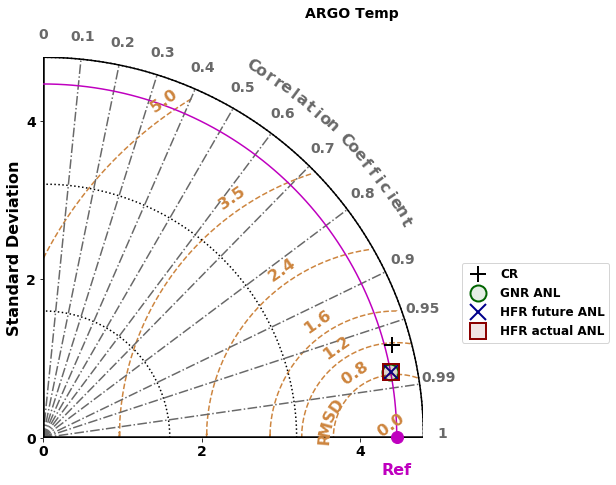

In [20]:
label = ['Argo'] + labels

fig_taylor_temp = plt.figure(num=1, figsize=(12,7))
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel=label,  markerLabelColor = 'r', 
                      markerLegend = 'on', markerColor = colors,
                      styleOBS = '-', colOBS = 'm', markerobs = 'o',
                      markerSize = 16, tickRMS = [0.0, 0.8, 1.2, 1.6, 2.4, 3.5, 5], 
                      colRMS = 'peru', colCOR = 'dimgrey',
                      tickRMSangle = 125, showlabelsRMS = 'on',
                      titleRMS = 'on', titleOBS = 'Ref', checkstats = 'on', alpha=0.1, axismax=4.8)#, overlay=True)


plt.suptitle('ARGO Temp', fontsize=14, fontweight='bold')

plt.show()

In [21]:
fig_taylor_temp.savefig('/home/jhernandez/Escritorio/OSSE/taylor_diagram_temperature_argo_OSSE_anl.png', dpi=250)

## Find Profiles far from real ARGO buoys

In [ ]:
from scipy.ndimage.morphology import distance_transform_edt

In [ ]:
# Define paths to Argo and model reference files
file_argo = '/home/modelling/data/WMOP/WMOP_FORECAST/Outputs/FORECAST_CMEMS_RESTARTS/archive/{0}/roms_Argo_{1}_dt.nc'.format(date.strftime('%Y/%m'),date.strftime('%Y%m%d'))
# Load Argo and WMOP reference (NOASSIM) DataSets
ds_argo = xr.open_dataset(file_argo)

In [ ]:
ds_argo.lon_argo.values

In [ ]:


def find_virtual_argo(ds_wmop, lon_argo, lat_argo, nobs):

    # Longitude and Latitude of the Argo profiles
    lon_wmop = ds_wmop.lon_rho.values[1,:]
    lat_wmop = ds_wmop.lat_rho.values[:,1]

    # Index of Nearest neighbour to Argo observations
    id_lon = [np.abs(lon_wmop-lon).argmin() for lon in lon_argo] 
    id_lat = [np.abs(lat_wmop-lat).argmin() for lat in lat_argo] 

    mask = ds_wmop.mask_rho.values 
    mask[id_lat,id_lon]=0        # mask positions of Argo buoys
    d = distance_transform_edt(mask)   # Compute distance to closest masked point

    id_lonv = []
    id_latv = []

    for i in range(nobs):

        idx = np.argwhere(d == np.max(d))
        mask[idx[0][0],idx[0][1]]=0
        d = distance_transform_edt(mask)

        id_lonv.append(idx[0][1])
        id_latv.append(idx[0][0])

    return id_lonv, id_latv


## Extract values of virtual ARGO

In [ ]:
experiments = ['NOASSIM','all_future_nudging', 'all_actual_nudging', 'generic_nudging', 'all_future_nonudging', 'all_actual_nonudging', 'generic_nonudging']

# Create empty dictionaries to store profiles
temp = {}; salt = {}

# Define date
date = datetime(2014,9,21)
date_end = datetime(2014,10,20)

while date<date_end:
    
    strdate = date.strftime('%Y%m%d')
    temp[strdate] = {}
    salt[strdate] = {}
    
    # Define paths to Argo and model reference files
    file_argo = '/home/modelling/data/WMOP/WMOP_FORECAST/Outputs/FORECAST_CMEMS_RESTARTS/archive/{0}/roms_Argo_{1}_dt.nc'.format(date.strftime('%Y/%m'),date.strftime('%Y%m%d'))
    # Load Argo and WMOP reference (NOASSIM) DataSets
    ds_argo = xr.open_dataset(file_argo)
    
    # Load NR
    file_nr = '/home/modelling/data/WMOP/WMOP_FORECAST/Outputs/FORECAST_CMEMS_RESTARTS/forecast_scratch//roms_WMOP_FORECAST_{0}_his.nc'.format(strdate)
    ds_nr = xr.open_dataset(file_nr)
    
    # Find position of virtual Argo
    id1, id2 = find_virtual_argo(ds_nr, ds_argo.lon_argo.values, ds_argo.lat_argo.values, 6)
    
    temp[strdate]['argo_virtual'] = [ds_nr.temp[0,:,lat, lon].values for lon, lat in zip(id1, id2)]
    temp[strdate]['argo_virtual'] = np.concatenate(temp[strdate]['argo_virtual'])
    salt[strdate]['argo_virtual'] = [ds_nr.salt[0,:,lat, lon].values for lon, lat in zip(id1, id2)]
    salt[strdate]['argo_virtual'] = np.concatenate(salt[strdate]['argo_virtual'])

    for exp_name in experiments:

        if exp_name in ['NOASSIM']:            
            path_wmop = '/home/modelling/data/workdir_2/HFR_DA/HFR_{0}_Oct2014'.format(exp_name)            
        else:
            path_wmop = '/DATA/jhernandez/ROMS/Outputs/HFR_{0}_Oct2014_OSSE/'.format(exp_name)
            
        # Define path to WMOP ASSIM file
        file_wmop = '{0}/roms_WMOP_ASSIM_{1}_avg.nc'.format( path_wmop, date.strftime('%Y%m%d'))
        # Load DataSet
        ds_wmop = xr.open_dataset(file_wmop)
        
        temp[strdate][exp_name] = [ds_wmop.temp[0,:,lat, lon].values for lon, lat in zip(id1, id2)]
        temp[strdate][exp_name] = np.concatenate(temp[strdate][exp_name])
        salt[strdate][exp_name] = [ds_wmop.salt[0,:,lat, lon].values for lon, lat in zip(id1, id2)]
        salt[strdate][exp_name] = np.concatenate(salt[strdate][exp_name])
        
    date = date + timedelta(days=1)
        
print('DONE')        

In [ ]:
id1_nan = np.isnan(temp['20140921']['argo_virtual'])==0
id1_nan
print(temp['20140921']['NOASSIM'].shape)
print(temp['20140921']['argo_virtual'].shape)
print(temp['20140921']['all_future_nudging'].shape)

## Create full time period vectors containing all the observations

For every day NaN values from Argo obs (due to interpolation mainly) are extracted and all daily profiles are put as a vector. 

All observations are concatenated, having a unique vector with all observations for the full period

In [ ]:
# Create time series of the full period
temp['full-period'] = {}
salt['full-period'] = {}

for k in  list(temp['20140921']):
    temp['full-period'][k] = np.array([])
    salt['full-period'][k] = np.array([])

# Loop over the days of simulation
for i, day in enumerate(list(temp.keys())[:-1]):
    
    # Localize NaN values
    id1_nan = np.isnan(temp[day]['argo_virtual'])==0
    id2_nan = np.isnan(salt[day]['argo_virtual'])==0
 
    # Loop over the different simulations for every day
    for k in  temp[day]:  
       
        temp['full-period'][k] = np.concatenate(( temp['full-period'][k], temp[day][k][id1_nan]))
        salt['full-period'][k] = np.concatenate(( salt['full-period'][k], salt[day][k][id2_nan]))
        

# Calculate RMSD evolution Virtual Argo

In [ ]:
import skill_metrics as sm

In [ ]:
temp['20140925'].keys()

In [ ]:
temp['rmsd'] = {};
salt['rmsd'] = {};
#exps = [list(temp['20140921'].keys())[i] for i in [1,3,4,5]]
exps = ['NOASSIM', 'all_future_nudging', 'all_actual_nudging', 'generic_nudging', 'all_future_nonudging', 'all_actual_nonudging', 'generic_nonudging']

for k in  exps:
    temp['rmsd'][k] = []
    salt['rmsd'][k] = []
    
    for i, day in enumerate(list(temp.keys())[:-2]):
   
        # Localize NaN values
        id1_nan = np.isnan(temp[day]['argo_virtual'])==0
        id2_nan = np.isnan(salt[day]['argo_virtual'])==0
        
        temp['rmsd'][k].append( sm.rmsd(temp[day][k][id1_nan], temp[day]['argo_virtual'][id1_nan])) 
        salt['rmsd'][k].append( sm.rmsd(salt[day][k][id2_nan], salt[day]['argo_virtual'][id2_nan])) 
        
    temp['rmsd'][k] = np.array(temp['rmsd'][k])
    salt['rmsd'][k] = np.array(salt['rmsd'][k])
                

## Plot RMSD evolution Virtual Argo

#### Plot

In [ ]:
# Define experiments and labels for legend
exp_names = ['NOASSIM', 'generic_nudging', 'generic_nonudging', 'all_future_nudging', 'all_future_nonudging', 'all_actual_nudging', 'all_actual_nonudging']
labels = ['NOASSIM', 'GNR NDG', 'GNR ANL', 'HFR future NDG', 'HFR future ANL', 'HFR actual NDG', 'HFR actual ANL']
colors = ['m', 'olivedrab', 'darkgreen', 'dodgerblue', 'darkblue', 'salmon', 'darkred']

# Subset
subset = [0,1,3,5]
subset = [0,2,4,6]
#subset = [0,1,2,3,4,5,6]
exp_names = [exp_names[i] for i in subset];  labels = [labels[i] for i in subset]; colors = [colors[i] for i in subset]


# Plot Salinity RMSD
fig_rmsd_argo_salt_virtual = plt.figure(figsize=(18,4))

for i, k in  enumerate(exp_names):
    plt.plot(salt['rmsd'][k], marker='s', linestyle='-', color=colors[i])
    
plt.legend(labels)
plt.title('RMSD evolution against Argo Salt Observations ', fontweight='bold', fontsize=15)
plt.grid(True)
plt.xticks(ticks=list(xt),labels=tt[0:-1:3])
plt.xlim((0,29))

plt.show()

# Plot Temperature RMSD
fig_rmsd_argo_temp_virtual = plt.figure(figsize=(18,4))

for i, k in  enumerate(exp_names):
    plt.plot(temp['rmsd'][k], marker='s', linestyle='-', color=colors[i])
    
plt.legend(labels)
plt.title('RMSD evolution against Argo Temp Observations ', fontweight='bold', fontsize=15)
plt.grid(True)
plt.xticks(ticks=list(xt),labels=tt[0:-1:3])
plt.xlim((0,29))

plt.show()

In [ ]:
fig_rmsd_argo_salt_virtual.savefig('/home/jhernandez/Escritorio/OSSE/rmsd_evolution_argo_salt_virtual_OSSE_anl.png', dpi=250)
fig_rmsd_argo_temp_virtual.savefig('/home/jhernandez/Escritorio/OSSE/rmsd_evolution_argo_temp_virtual_OSSE_anl.png', dpi=250)

## Taylor Diagram Virtual Argo

In [ ]:
import skill_metrics as sm

In [ ]:
# Define experiments and labels for legend
exp_names = ['NOASSIM', 'generic_nudging', 'generic_nonudging', 'all_future_nudging', 'all_future_nonudging', 'all_actual_nudging', 'all_actual_nonudging']
labels = ['NOASSIM', 'GNR NDG', 'GNR ANL', 'HFR future NDG', 'HFR future ANL', 'HFR actual NDG', 'HFR actual ANL']
colors = ['black', 'olivedrab', 'darkgreen', 'dodgerblue', 'darkblue', 'salmon', 'darkred']

# Subset
#subset = [0,1,3,5]
subset = [0,2,4,6]
#subset = [0,1,2,3,4,5,6]
exp_names = [exp_names[i] for i in subset];  labels = [labels[i] for i in subset]; colors = [colors[i] for i in subset]



### Salinity

In [ ]:
sdev = []; crmsd = []; ccoef = []; taylor_stats = {}

# Calculate taylor diagram stats for the different experiments selcted
for e in exp_names:
    taylor_stats[e] = sm.taylor_statistics(salt['full-period'][e], salt['full-period']['argo_virtual'])
    sdev.append(taylor_stats[e]['sdev'][1])
    crmsd.append(taylor_stats[e]['crmsd'][1])
    ccoef.append(taylor_stats[e]['ccoef'][1])

# Add reference value and convert to array
sdev = np.array([taylor_stats['NOASSIM']['sdev'][0]] + sdev)
crmsd = np.array([taylor_stats['NOASSIM']['crmsd'][0]] + crmsd)
ccoef = np.array([taylor_stats['NOASSIM']['ccoef'][0]] + ccoef)

In [ ]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

In [ ]:
label = ['Argo'] + labels

fig_taylor_salt_virtual = plt.figure(num=1, figsize=(12,7))
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel=label,  markerLabelColor = 'r', 
                      markerLegend = 'on', markerColor = colors,
                      styleOBS = '-', colOBS = 'm', markerobs = 'o',
                      markerSize = 16, tickRMS = [0.0, 0.2, 0.4, 0.6, 0.8], 
                      colRMS = 'peru', colCOR = 'dimgrey',
                      tickRMSangle = 120, showlabelsRMS = 'on',
                      titleRMS = 'on', titleOBS = 'Ref', checkstats = 'on', alpha=0.1)

plt.suptitle('ARGO Salinity', fontsize=14, fontweight='bold')

plt.show()

In [ ]:
fig_taylor_salt_virtual.savefig('/home/jhernandez/Escritorio/OSSE/taylor_diagram_salinity_argo_virtual_OSSE_anl.png', dpi=250)

### Temperature

In [ ]:
sdev = []; crmsd = []; ccoef = []; taylor_stats = {}

# Calculate taylor diagram stats for the different experiments selcted
for e in exp_names:
    taylor_stats[e] = sm.taylor_statistics(temp['full-period'][e], temp['full-period']['argo_virtual'])
    sdev.append(taylor_stats[e]['sdev'][1])
    crmsd.append(taylor_stats[e]['crmsd'][1])
    ccoef.append(taylor_stats[e]['ccoef'][1])

# Add reference value and convert to array
sdev = np.array([taylor_stats['NOASSIM']['sdev'][0]] + sdev)
crmsd = np.array([taylor_stats['NOASSIM']['crmsd'][0]] + crmsd)
ccoef = np.array([taylor_stats['NOASSIM']['ccoef'][0]] + ccoef)

In [ ]:

label = ['Argo'] + labels

fig_taylor_temp_virtual = plt.figure(num=1, figsize=(12,8))
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel=label,  markerLabelColor = 'r', 
                      markerLegend = 'on', markerColor = colors,
                      styleOBS = '-', colOBS = 'm', markerobs = 'o',
                      markerSize = 16, tickRMS = [0.0, 2, 4, 6], 
                      colRMS = 'peru', colCOR = 'dimgrey',
                      tickRMSangle = 130, showlabelsRMS = 'on', axismax=5.5,
                      titleRMS = 'on', titleOBS = 'Ref', checkstats = 'on', alpha=0.1)

plt.suptitle('ARGO Temperature', fontsize=14, fontweight='bold')

plt.show()

In [ ]:
fig_taylor_temp_virtual.savefig('/home/jhernandez/Escritorio/OSSE/taylor_diagram_temperature_argo_virtual_OSSE_anl.png', dpi=250)